In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [ ]:
#Importing necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the dataset
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [9]:
# 1. Explore basic info
print("Basic Info:\n")
print(df.info())

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print("\nDescription:\n", df.describe(include='all'))


Description:
         PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.0000

In [23]:
# 2. Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)  # Drop only if exists


In [25]:
# 3. Encode categorical features
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0

In [26]:
# One-hot Encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [28]:
# 4. Normalize/Standardize numerical features
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

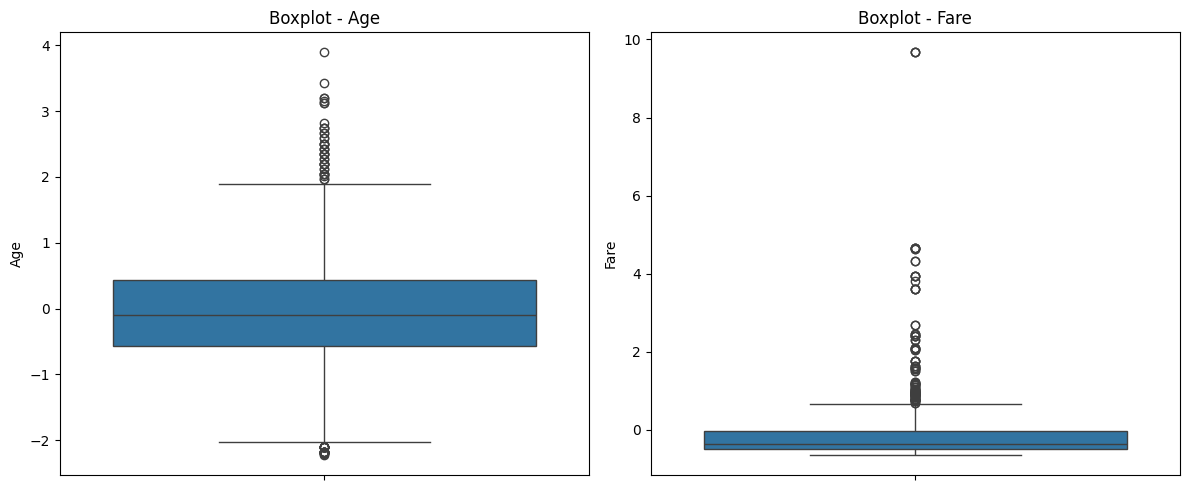

In [29]:
# 5. Visualize outliers using boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Boxplot - Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title("Boxplot - Fare")
plt.tight_layout()
plt.show()

In [30]:
# Remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))]

df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

In [31]:
# Final dataset preview
print("\nCleaned Dataset Preview:\n")
print(df.head())


Cleaned Dataset Preview:

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    0 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1      0   
4                      Allen, Mr. William Henry    1  0.433312      0      0   
5                              Moran, Mr. James    1 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445       False        True  
2  STON/O2. 3101282 -0.488854       False        True  
3            113803  0.420730       False        True  
4            373450 -0.486337       False        Tr

In [32]:
# Save cleaned dataset
df.to_csv("Cleaned_Titanic_Dataset.csv", index=False)